# Logistic Regression
![error](log_reg_1.png)

![error](log_reg_2.png)

![error](log_reg_3.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("E:\Machine Learning\ML from scratch\Data\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

NA Values not present on the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

1-Pregnancies

2-Glucose

3-BloodPressure

4-SkinThickness

5-Insulin

6-BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values.

In [6]:
data_copy = data.copy(deep=True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

To fill these Nan values the data distribution needs to be understood

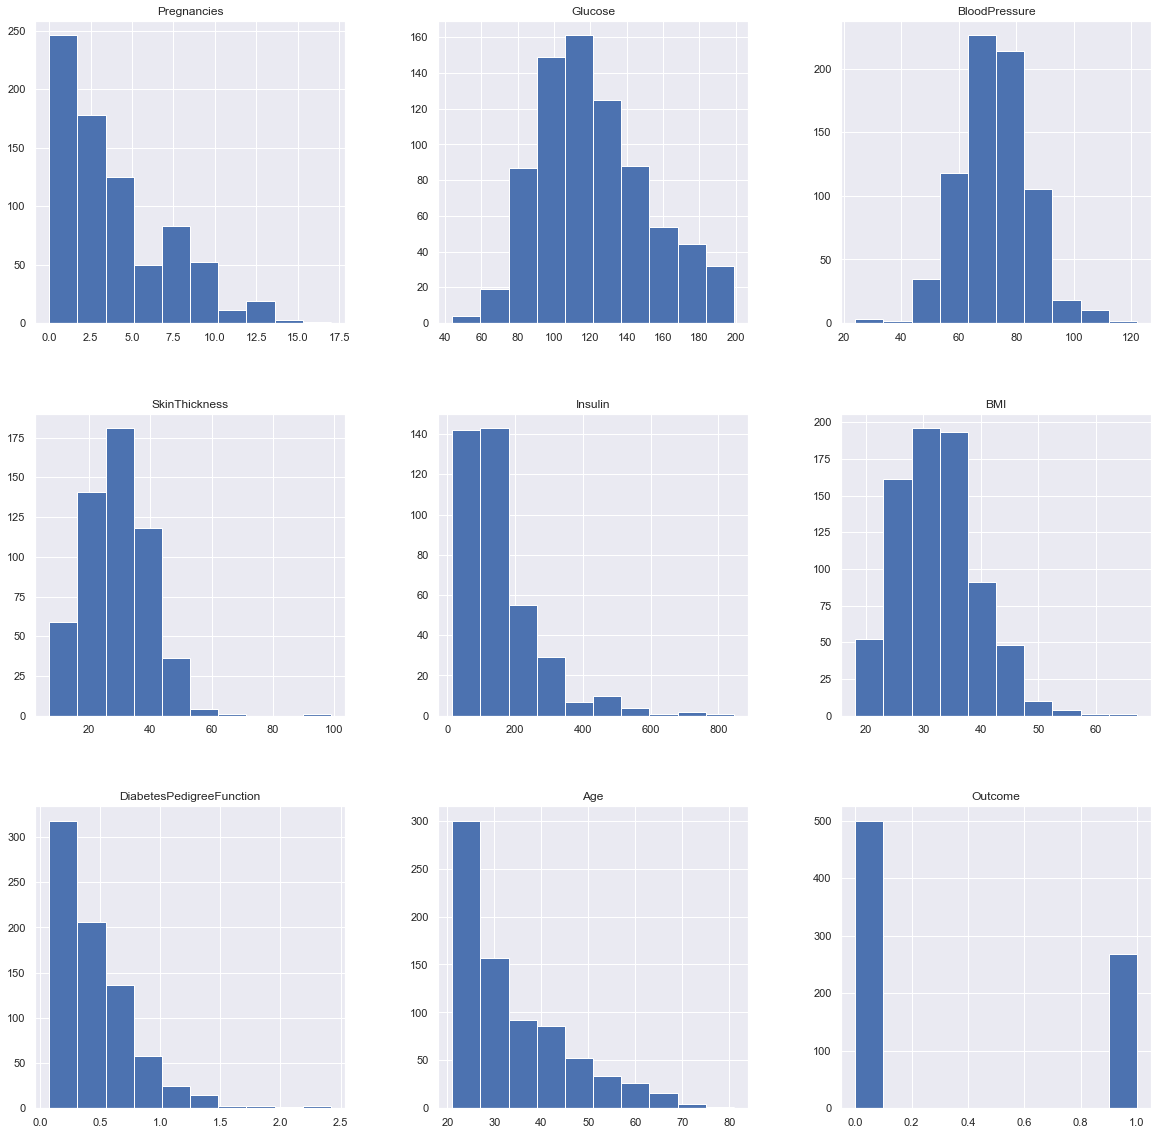

In [7]:
p=data_copy.hist(figsize = (20,20))

Aiming to impute nan values for the columns in accordance with their distribution

In [8]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
data_copy['BloodPressure'].fillna( data_copy['BloodPressure'].mean(),inplace=True)
data_copy['SkinThickness'].fillna( data_copy['SkinThickness'].median(),inplace=True)
data_copy['Insulin'].fillna( data_copy['Insulin'].median(),inplace=True)
data_copy['BMI'].fillna( data_copy['BMI'].mean(),inplace=True)

After replacing Nan Values distribution

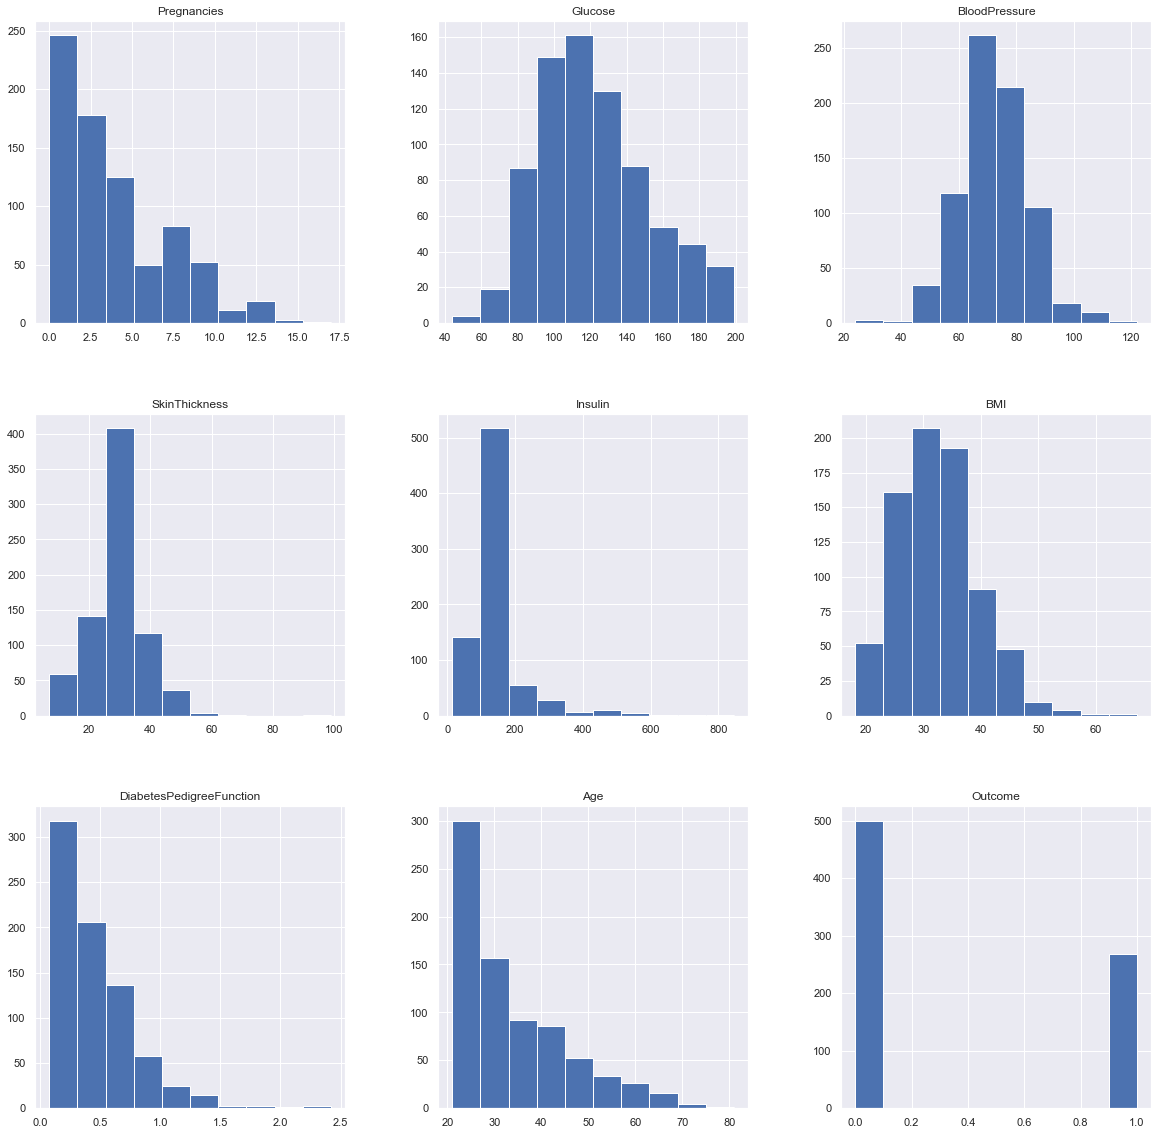

In [9]:
p = data_copy.hist(figsize=(20,20))

In [10]:
data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data_copy['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
data_copy.Outcome.unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

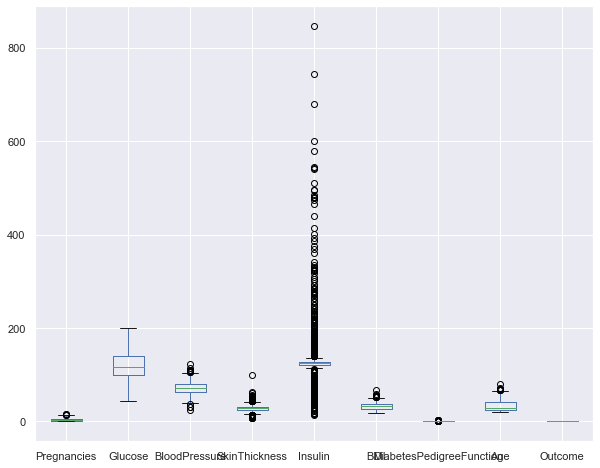

In [13]:
data_copy.plot(kind='box', figsize=(10,8))

We found their are outliers present on the 'Insulin','Pregnancies','SkinThickness','DiabetesPedigreeFunction','BMI','Age' columns. We want to remove that outliers form the dataset. Their are too much outliers peresnt on the Insulin. need to drop insulin column from data set.

In [14]:
data_copy.drop(columns=['Insulin'], axis =1, inplace=True)

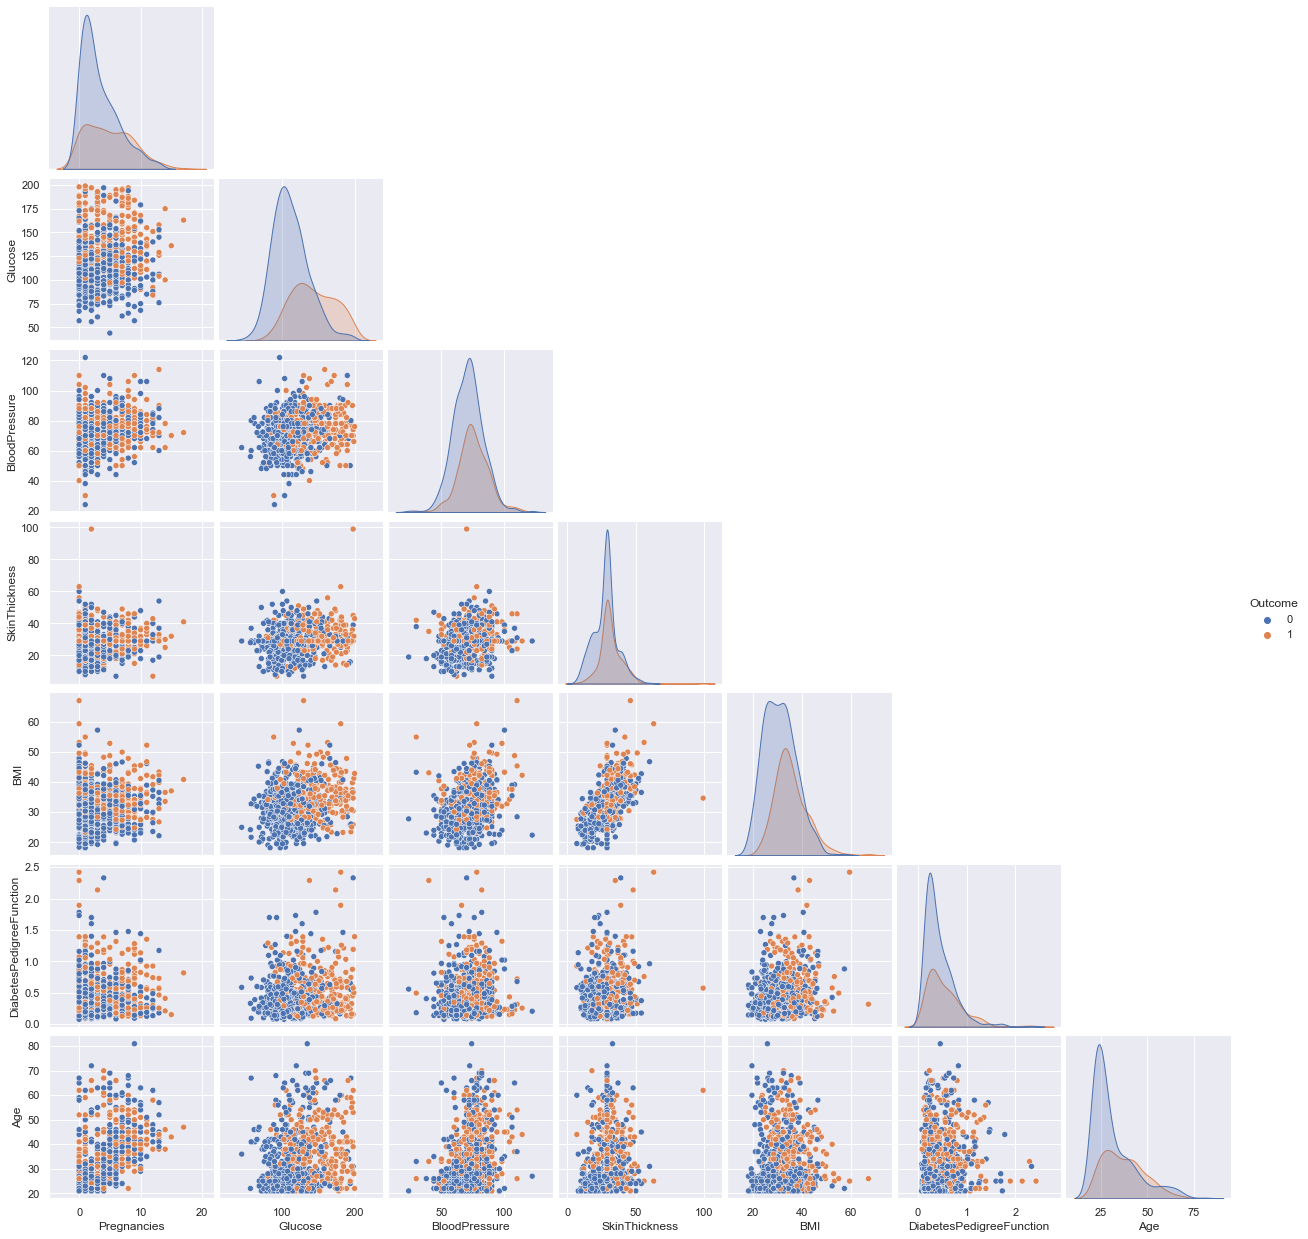

In [15]:
p = sns.pairplot(data_copy, hue = 'Outcome', corner = True)

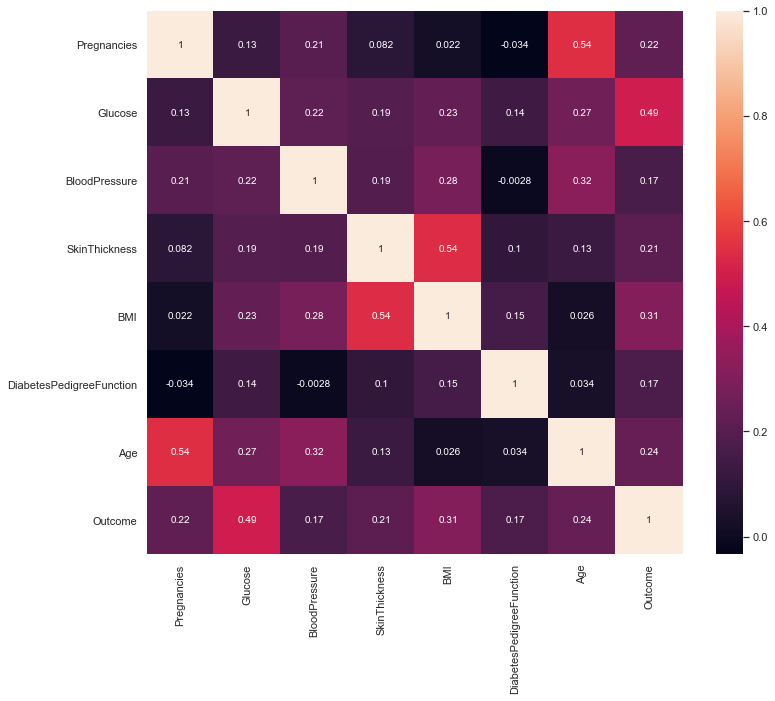

In [16]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data_copy.corr(), annot=True)

In [17]:
X = data_copy.drop(['Outcome'], axis=1)
Y = data_copy.Outcome

In [18]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [20]:
X_train.shape, X_test.shape

((537, 7), (231, 7))

In [21]:
Y_train.shape, Y_test.shape

((537,), (231,))

In [22]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [23]:
def predict(final_pred , m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i]=1
    return y_pred

In [24]:
n_features = X_train.shape[1]
print('Number of Features', n_features)
w = np.zeros((1,n_features))
b = 0

lr = 0.0001
epoch = 4000
m=X.shape[0]
Y_T = pd.DataFrame(Y_train).T

costs = []

for i in range(epoch):
    
    #prediction
    final_result = sigmoid_activation(np.dot(w,X_train.T)+b)
    cost = (-1/m)*(sum(pd.DataFrame(((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))))
    
    #Gradient calculation
    dw = (1/m) * (np.dot(X_train.T,(final_result-Y_T).T)).T
    db = (1/m) * (sum(pd.DataFrame(final_result - Y_T)))

    #weight update
    w = w - lr * dw
    b = b - lr * db
    costs.append(cost)

print('Optimized weights', w)
print('Optimized intercept',b)

final_train_pred = sigmoid_activation(np.dot(w,X_train.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_test.T)+b)

m_train =  X_train.shape[0]
m_test =  X_test.shape[0]
#
Y_train_pred = predict(final_train_pred, m_train)
print('Training Accuracy',accuracy_score(Y_train_pred.T, Y_train))
#
Y_test_pred = predict(final_test_pred, m_test)
print('Test Accuracy',accuracy_score(Y_test_pred.T, Y_test))

Number of Features 7
Optimized weights [[0.02645174 0.0705905  0.02226812 0.02764809 0.04815323 0.02152695
  0.03841179]]
Optimized intercept -109.17083333333642
Training Accuracy 0.638733705772812
Test Accuracy 0.6796536796536796


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
confmat = confusion_matrix(Y_test_pred.T, Y_test)
confmat

array([[157,  74],
       [  0,   0]], dtype=int64)

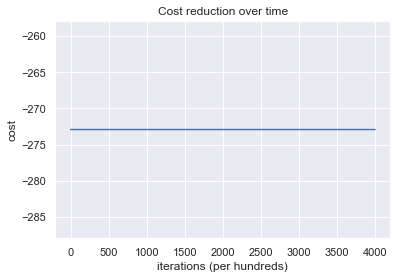

In [26]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()